<a href="https://colab.research.google.com/github/hsargoli/_WE_/blob/main/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

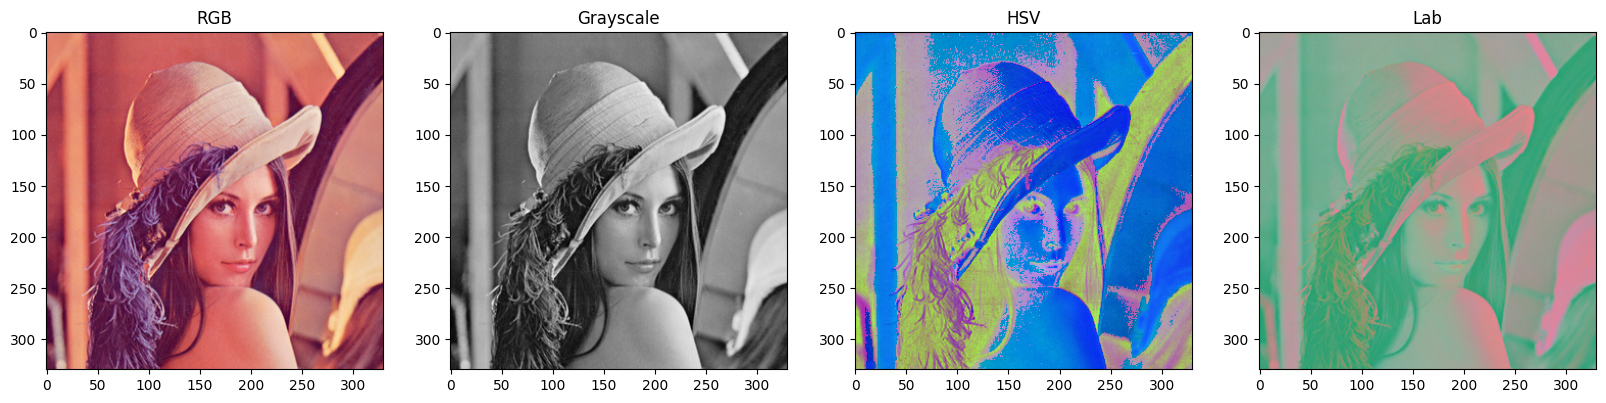

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load image in BGR (OpenCV's default)
image_bgr = cv2.imread('/content/drive/MyDrive/lana.png')

# Convert from BGR to Grayscale
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# Convert from BGR to HSV
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

# Convert from BGR to Lab
image_lab = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2LAB)

# Display the images side by side
fig, axs = plt.subplots(1, 4, figsize=(20, 10))

axs[0].imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
axs[0].set_title("RGB")

axs[1].imshow(image_gray, cmap='gray')
axs[1].set_title("Grayscale")

h, s, v = cv2.split(image_hsv)
axs[2].imshow(cv2.merge([h, s, v]))
axs[2].set_title("HSV")

l, a, b = cv2.split(image_lab)
axs[3].imshow(cv2.merge([l, a, b]))
axs[3].set_title("Lab")

plt.show()

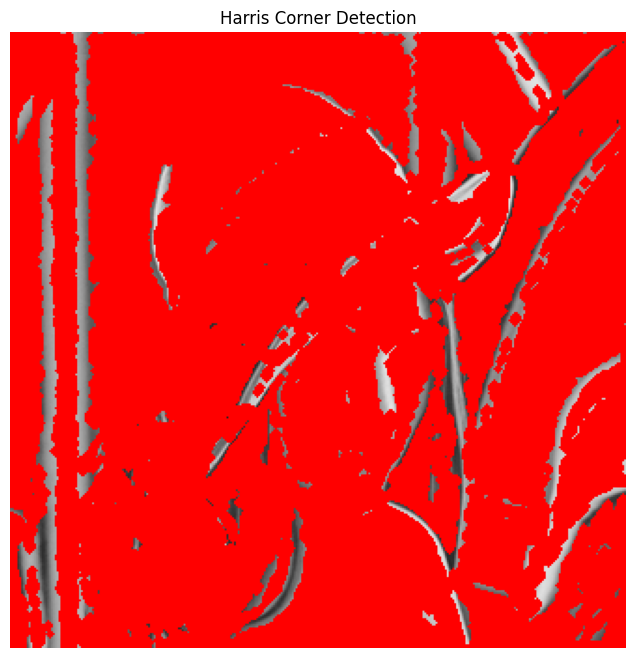

In [ ]:
import cv2
import numpy as np

def harris_corner_detection(image_path, k=0.04, threshold=10):
    """
    Performs Harris corner detection on an image.

    Args:
        image_path: Path to the input image.
        k: Sensitivity parameter for the Harris corner response function.
        threshold: Threshold for identifying corners.

    Returns:
        A NumPy array representing the image with corners marked.  Returns None if image loading fails.
    """
    try:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Error: Could not load image from {image_path}")
            return None

        # Calculate gradients using Sobel operator
        Ix = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
        Iy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

        # Calculate the structure tensor
        Ix2 = Ix**2
        Iy2 = Iy**2
        IxIy = Ix * Iy

        # Apply Gaussian smoothing (optional, but recommended for noise reduction)
        Ix2 = cv2.GaussianBlur(Ix2, (5, 5), 0)
        Iy2 = cv2.GaussianBlur(Iy2, (5, 5), 0)
        IxIy = cv2.GaussianBlur(IxIy, (5, 5), 0)


        # Calculate the Harris corner response function
        detM = Ix2 * Iy2 - IxIy**2
        traceM = Ix2 + Iy2
        R = detM - k * traceM**2

        # Thresholding and non-maximum suppression (simplified)
        R[R < threshold] = 0  #Simple thresholding

        # Find corner coordinates
        corners = np.argwhere(R > 0)


        # Mark corners on the image
        img_with_corners = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR) #Convert to color for marking
        for corner in corners:
            x, y = corner
            cv2.circle(img_with_corners, (y, x), 2, (0, 0, 255), -1) #Mark with red circles

        return img_with_corners
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


if __name__ == "__main__":
    image_path = '/content/drive/MyDrive/lana.png' # Replace with your image path
    result_image = harris_corner_detection(image_path)

    if result_image is not None:
        # Convert the OpenCV image (BGR) to RGB for Matplotlib
        result_image_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

        # Display using Matplotlib
        plt.figure(figsize=(10, 8))  # Adjust figure size as needed
        plt.imshow(result_image_rgb)
        plt.title("Harris Corner Detection")
        plt.axis('off')  # Hide axis ticks and labels
        plt.show()

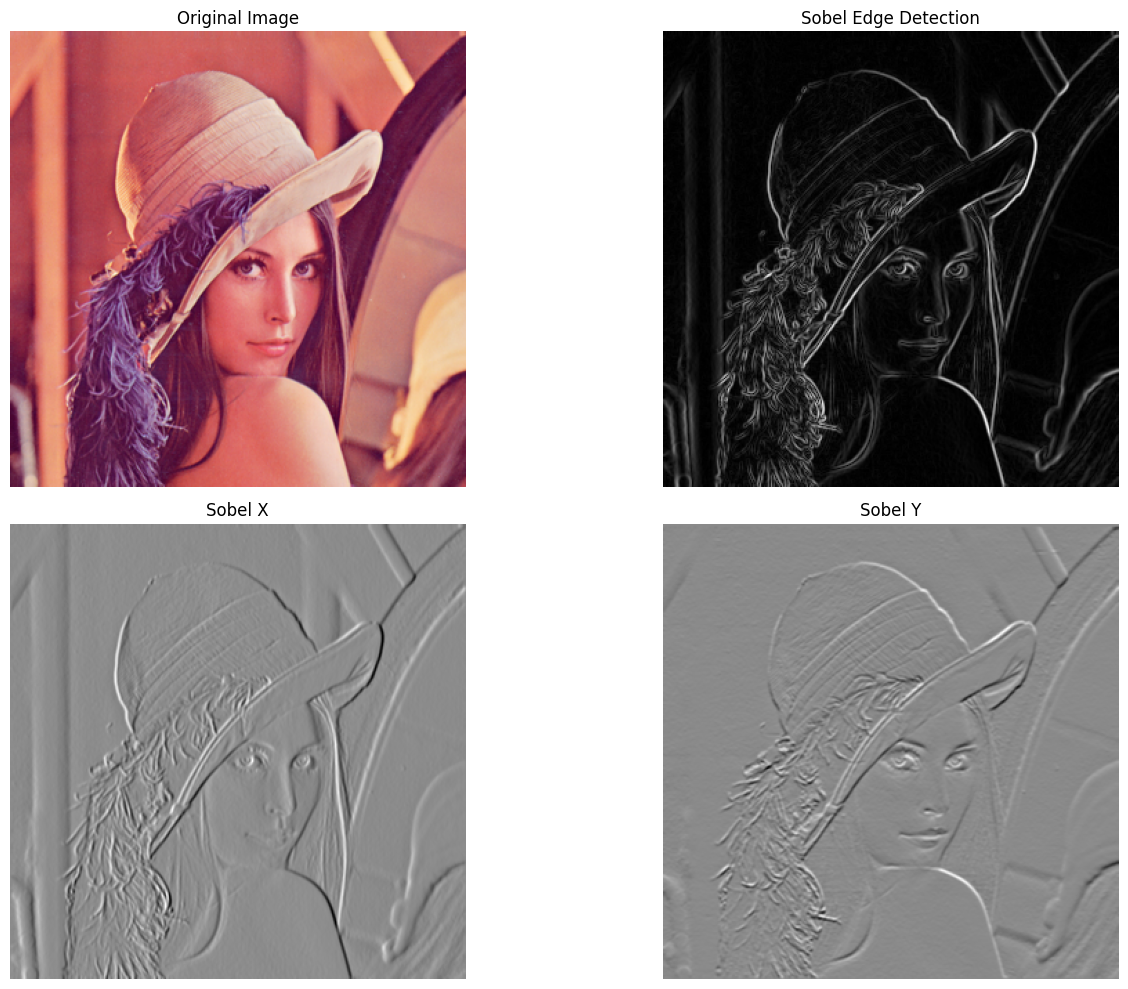

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def sobel_kernel(image):
    # Convert to grayscale
    img_gray = np.mean(np.array(image), axis=2)

    # Sobel kernels
    sobel_x = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
    sobel_y = np.array([
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]
    ])

    # Pad the image
    pad = 1
    padded_img = np.pad(img_gray, ((pad, pad), (pad, pad)), mode='edge')

    # Apply convolution
    h, w = img_gray.shape
    gx = np.zeros_like(img_gray)
    gy = np.zeros_like(img_gray)

    for y in range(h):
        for x in range(w):
            gx[y, x] = np.sum(padded_img[y:y+3, x:x+3] * sobel_x)
            gy[y, x] = np.sum(padded_img[y:y+3, x:x+3] * sobel_y)

    # Combine gradients
    edge_magnitude = np.sqrt(gx**2 + gy**2)

    # Normalize
    edge_magnitude = (edge_magnitude / np.max(edge_magnitude) * 255).astype(np.uint8)

    return edge_magnitude, gx, gy

def display_kernels(image_path):
    image = Image.open(image_path)

    # Create a figure with subplots
    plt.figure(figsize=(15, 10))

    # Original Image
    plt.subplot(2, 2, 1)
    plt.title('Original Image')
    plt.imshow(image)
    plt.axis('off')

    # Sobel Edge Detection
    sobel_edges, gx, gy = sobel_kernel(image)
    plt.subplot(2, 2, 2)
    plt.title('Sobel Edge Detection')
    plt.imshow(sobel_edges, cmap='gray')
    plt.axis('off')

    # Sobel X
    plt.subplot(2, 2, 3)
    plt.title('Sobel X')
    plt.imshow(gx, cmap='gray')
    plt.axis('off')

    # Sobel Y
    plt.subplot(2, 2, 4)
    plt.title('Sobel Y')
    plt.imshow(gy, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    # Replace with your image path
    display_kernels('/content/drive/MyDrive/lana.png')

In [ ]:

156 46 112 89 12
12 46 89 112 156
12 46 89 112 156 200


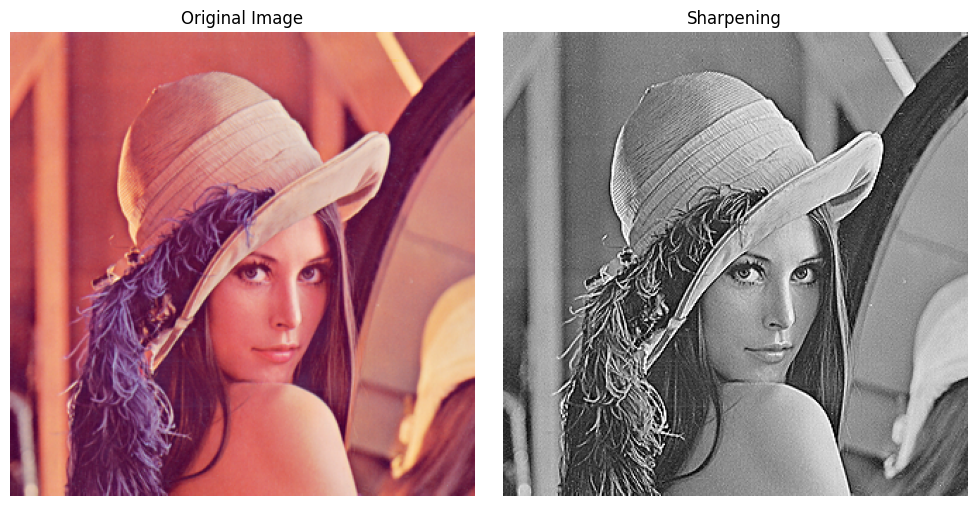

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def kernel_operation(image, kernel):
    """Applies a given kernel to the image."""
    img_gray = np.mean(np.array(image), axis=2).astype(float) # Ensure float for calculations
    pad = kernel.shape[0] // 2
    padded_img = np.pad(img_gray, ((pad, pad), (pad, pad)), mode='edge')
    h, w = img_gray.shape
    result = np.zeros_like(img_gray, dtype=float)
    for y in range(h):
        for x in range(w):
            result[y, x] = np.sum(padded_img[y:y+kernel.shape[0], x:x+kernel.shape[1]] * kernel)
    return (np.clip(result, 0, 255)).astype(np.uint8)


def display_kernels(image_path, kernels):
    """Displays the original image and its filtered versions using different kernels."""
    try:
        image = Image.open(image_path).convert("RGB") #Ensure image is in RGB format
    except FileNotFoundError:
        print(f"Error: Image not found at {image_path}")
        return
    except Exception as e:
        print(f"Error opening image: {e}")
        return

    num_kernels = len(kernels)
    plt.figure(figsize=(5 * (num_kernels + 1), 5)) # Adjust figure size based on number of kernels

    # Original Image
    plt.subplot(1, num_kernels + 1, 1)
    plt.title('Original Image')
    plt.imshow(image)
    plt.axis('off')

    for i, (kernel_name, kernel) in enumerate(kernels.items()):
        filtered_image = kernel_operation(image, kernel)
        plt.subplot(1, num_kernels + 1, i + 2)
        plt.title(kernel_name)
        plt.imshow(filtered_image, cmap='gray')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    # Replace with your image path
    image_path = '/content/drive/MyDrive/lana.png' #Example path, replace with yours.

    # Define kernels.  Normalization is crucial for many kernels.
    kernels = {
        "Sharpening": np.array([[0, -1, 0],
                                [-1, 5, -1],
                                [0, -1, 0]]),

        # "Blurring 3x3": np.array([[1, 1, 1],
        #                           [1, 1, 1],
        #                           [1, 1, 1]]) / 9,

        # "Edge Detection (Sobel X)": np.array([[-1, 0, 1],
        #                                       [-2, 0, 2],
        #                                       [-1, 0, 1]]),

        # "Edge Detection (Sobel Y)": np.array([[-1, -2, -1],
        #                                       [0, 0, 0],
        #                                       [1, 2, 1]]),
        # "Emboss": np.array([[-2, -1, 0],
        #                     [-1, 1, 1],
        #                     [0, 1, 2]])
    }

    display_kernels(image_path, kernels)

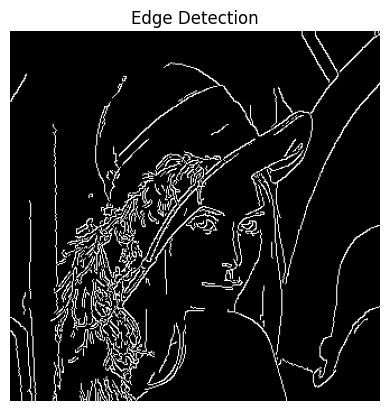

In [ ]:
# ------------------------------------------------------------------------------
# edge   -----------------------------------------------------------------------
# ------------------------------------------------------------------------------
import cv2
import numpy as np
import matplotlib.pyplot as plt
imgp = '/content/drive/MyDrive/lana.png'
# Load image
image = cv2.imread(imgp, cv2.IMREAD_GRAYSCALE)

# Perform Canny edge detection
edges = cv2.Canny(image, 100, 200)

# Display the results
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')
plt.show()

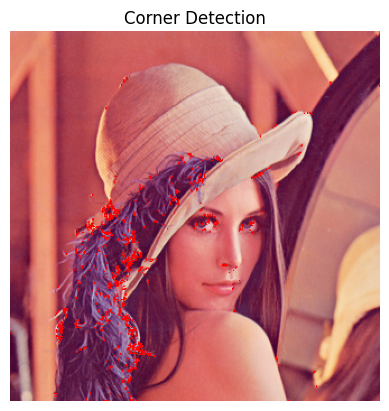

In [ ]:
# ------------------------------------------------------------------------------
# 'Corner Detection'   ------------------------------------------------------
# ------------------------------------------------------------------------------
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in color
imgp = '/content/drive/MyDrive/lana.png'
image = cv2.imread(imgp)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Find corners using Harris Corner Detection
corners = cv2.cornerHarris(gray_image, 2, 3, 0.04)

# Create a copy of the original image to draw corners
image_with_corners = np.copy(image)

# Mark corners in the color image (using red color)
image_with_corners[corners > 0.01 * corners.max()] = [0, 0, 255]  # Marking corners with red

# Display the results
plt.imshow(cv2.cvtColor(image_with_corners, cv2.COLOR_BGR2RGB))
plt.title('Corner Detection')
plt.axis('off')
plt.show()

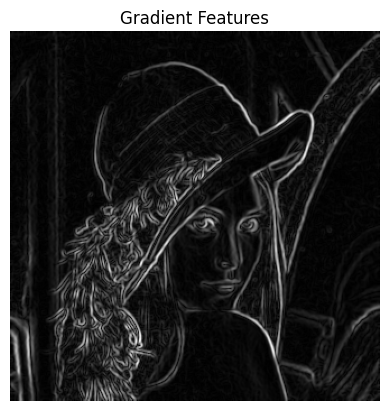

In [ ]:
# ------------------------------------------------------------------------------
# ('Gradient Features')   ------------------------------------------------------
# ------------------------------------------------------------------------------
import cv2
import numpy as np
import matplotlib.pyplot as plt



imgp = '/content/drive/MyDrive/lana.png'
image = cv2.imread(imgp)

# Load image

# Convert to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Calculate gradient using Sobel operator
gradient_x = cv2.Sobel(hsv_image[:, :, 1], cv2.CV_64F, 1, 0, ksize=5)  # Hue channel
gradient_y = cv2.Sobel(hsv_image[:, :, 1], cv2.CV_64F, 0, 1, ksize=5)

# Combine gradients
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

# Display the results
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Features')
plt.axis('off')
plt.show()

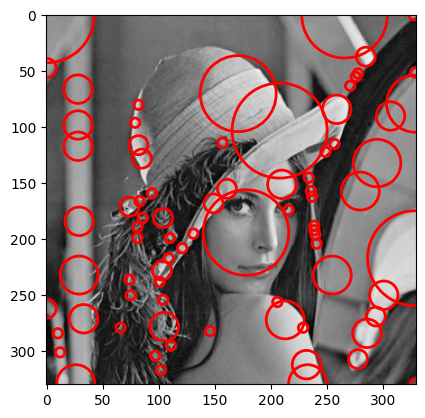

In [ ]:
# ------------------------------------------------------------------------------
# blob_detection   -------------------------------------------------------------------
# ------------------------------------------------------------------------------

from skimage import data, io, img_as_float
from skimage.feature import blob_log
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import numpy as np

imgp = '/content/drive/MyDrive/lana.png'

# Load the image using io.imread
image = io.imread(imgp)

# Convert to grayscale if necessary (io.imread might already return grayscale)
if len(image.shape) == 3: #check if image is RGB
    image_gray = rgb2gray(image)
else:
    image_gray = image

# Detect blobs using Laplacian of Gaussian
blobs_log = blob_log(image_gray, min_sigma=3, max_sigma=30, num_sigma=10, threshold=.1)

# Convert the output to a list of (x, y, r) tuples
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)

# Display the results
fig, ax = plt.subplots(1, 1)
plt.imshow(image_gray, cmap='gray') #added cmap='gray' for better visualization of grayscale image.
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
    ax.add_patch(c)
plt.show()

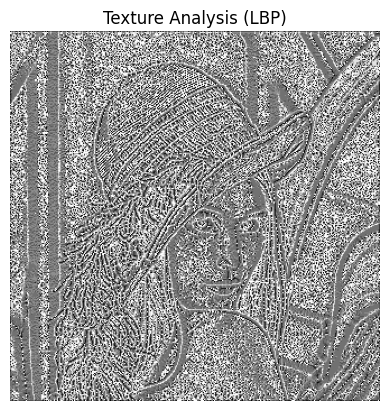

In [ ]:
# ------------------------------------------------------------------------------
# Texture Analysis (LBP)   -----------------------------------------------------
# ------------------------------------------------------------------------------

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature


# Load image
image = cv2.imread(imgp, cv2.IMREAD_GRAYSCALE)

# Calculate Local Binary Pattern (LBP)
lbp = feature.local_binary_pattern(image, P=8, R=1, method='uniform')

# Display the results
plt.imshow(lbp, cmap='gray')
plt.title('Texture Analysis (LBP)')
plt.axis('off')
plt.show()

In [ ]:
# ------------------------------------------------------------------------------
# max_abs_scaling   ------------------------------------------------------------
# ------------------------------------------------------------------------------
def max_abs_scaling(data):
    """
    Scales a list of numerical values using MaxAbs Scaling.

    Parameters:
        data (list): A list of numerical values to scale.

    Returns:
        list: A list of scaled values.
    """
    max_abs_value = max(abs(x) for x in data)

    # Avoid division by zero
    if max_abs_value == 0:
        return [0 for _ in data]

    scaled_data = [x / max_abs_value for x in data]

    return scaled_data

# Example usage
if __name__ == "__main__":
    original_data = [4000, -2500, 3000, -5000, 1000, 4500]
    scaled_data = max_abs_scaling(original_data)

    print("Original Data:", original_data)
    print("Scaled Data (MaxAbs Scaling):", scaled_data)

Original Data: [4000, -2500, 3000, -5000, 1000, 4500]
Scaled Data (MaxAbs Scaling): [0.8, -0.5, 0.6, -1.0, 0.2, 0.9]


In [ ]:
# ------------------------------------------------------------------------------
# z_score_normalize   ----------------------------------------------------------
# ------------------------------------------------------------------------------
def z_score_normalize(data):
    """
    Normalizes a list of numerical values using Z-Score normalization.

    Parameters:
        data (list): A list of numerical values to normalize.

    Returns:
        list: A list of normalized values.
    """
    mean = sum(data) / len(data)
    variance = sum((x - mean) ** 2 for x in data) / len(data)
    std_dev = variance ** 0.5

    normalized_data = [(x - mean) / std_dev for x in data]

    return normalized_data

# Example usage
if __name__ == "__main__":
    original_data = [4000, 2500, 3000, 5000, 1000, 4500]
    normalized_data = z_score_normalize(original_data)

    print("Original Data:", original_data)
    print("Normalized Data (Z-Score):", normalized_data)

Original Data: [4000, 2500, 3000, 5000, 1000, 4500]
Normalized Data (Z-Score): [0.49613893835683376, -0.6201736729460425, -0.24806946917841707, 1.2403473458920846, -1.7364862842489188, 0.8682431421244592]


In [ ]:
# ------------------------------------------------------------------------------
# min_max_normalize   ----------------------------------------------------------
# ------------------------------------------------------------------------------
def min_max_normalize(data):
    """
    Normalizes a list of numerical values to the range [0, 1].

    Parameters:
        data (list): A list of numerical values to normalize.

    Returns:
        list: A list of normalized values.
    """
    min_value = min(data)
    max_value = max(data)

    normalized_data = [(x - min_value) / (max_value - min_value) for x in data]

    return normalized_data

# Example usage
if __name__ == "__main__":
    original_data = [4000, 2500, 3000, 5000, 1000, 4500]
    normalized_data = min_max_normalize(original_data)

    print("Original Data:", original_data)
    print("Normalized Data:", normalized_data)

Original Data: [4000, 2500, 3000, 5000, 1000, 4500]
Normalized Data: [0.75, 0.375, 0.5, 1.0, 0.0, 0.875]


In [ ]:
# ------------------------------------------------------------------------------
# histogram   ------------------------------------------------------------------
# ------------------------------------------------------------------------------
import cv2
import numpy as np
from skimage import feature
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/drive/MyDrive/lana.png')s
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Feature Extraction Techniques

# 1. Edge Detection using Canny
edges = cv2.Canny(gray, 100, 200)

# 2. Texture Extraction using Local Binary Patterns (LBP)
radius = 3
n_points = 8 * radius
lbp = feature.local_binary_pattern(gray, n_points, radius, method='uniform')

# 3. Color Histogram
hist_b = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([image], [1], None, [256], [0, 256])
hist_r = cv2.calcHist([image], [2], None, [256], [0, 256])



# 4. Keypoints Detection using SIFT
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Display results
plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(2, 2, 2)
plt.title('Canny Edges')
plt.imshow(edges, cmap='gray')

plt.subplot(2, 2, 3)
plt.title('Local Binary Patterns')
plt.imshow(lbp, cmap='gray')

plt.subplot(2, 2, 4)
plt.title('Keypoints Detection (SIFT)')
img_with_keypoints = cv2.drawKeypoints(image, keypoints, None)
plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))

plt.show()

# Display Color Histograms



plt.figure(figsize=(12, 4))
plt.title('Color Histograms')
plt.plot(hist_b, color='blue')
plt.plot(hist_g, color='green')
plt.plot(hist_r, color='red')
plt.xlim([0, 256])
plt.show()


SyntaxError: invalid syntax (<ipython-input-2-e701eef85be8>, line 10)

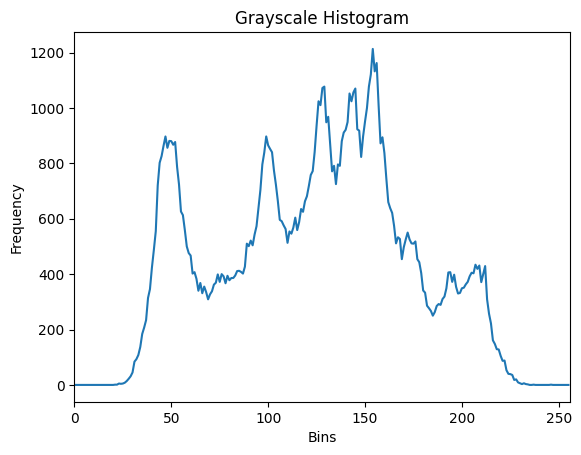

In [ ]:
# ------------------------------------------------------------------------------
# histogram   ------------------------------------------------------------------
# ------------------------------------------------------------------------------

import cv2
import numpy as np
from skimage import feature
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/drive/MyDrive/lana.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Feature Extraction Techniques

# 1. Edge Detection using Canny
edges = cv2.Canny(gray, 100, 200)

# 2. Texture Extraction using Local Binary Patterns (LBP)
radius = 3
n_points = 8 * radius
lbp = feature.local_binary_pattern(gray, n_points, radius, method='uniform')

# 3. Gray Histogram
hist_gray = cv2.calcHist([gray], [0], None, [256], [0, 256])


# Display or further process the histogram (example using matplotlib)
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.plot(hist_gray)
plt.xlim([0, 256])
plt.show()

In [ ]:
image_pca

Shape of image_pca: (1, 1)
Dimensions of image_pca: 2
Type of image_pca: float32


In [ ]:
# ------------------------------------------------------------------------------
# Noise reduction  -------------------------------------------------------------
# ------------------------------------------------------------------------------
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('/content/drive/MyDrive/frogjpg.jpg')  # Replace 'image.jpg' with your image file path

from skimage import io, filters
import matplotlib.pyplot as plt

def median_filter(image_path, kernel_size=3):
    """
    Reduces salt-and-pepper noise in an image using median filtering.

    Args:
        image_path: Path to the input image.
        kernel_size: Size of the median filter kernel (odd integer).

    Returns:
        The denoised image as a NumPy array. Returns None if the image cannot be loaded.
    """
    try:
        img = io.imread(image_path, as_gray=True) # Read as grayscale. For color images, remove as_gray=True.
        if img is None:
            print(f"Error: Could not load image from {image_path}")
            return None
        denoised_img = filters.median(img, selem=np.ones((kernel_size, kernel_size)))
        return denoised_img
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


# Example usage:
image_path = "/content/drive/MyDrive/ssa.jpg"  # Replace with your image path
denoised_image = median_filter(image_path)

if denoised_image is not None:
    plt.imshow(denoised_image, cmap='gray')
    plt.title('Denoised Image')
    plt.show()
    #io.imsave("denoised_image.jpg", denoised_image) # Uncomment to save the denoised image

An error occurred: median() got an unexpected keyword argument 'selem'


In [ ]:
# ------------------------------------------------------------------------------
# Normalization  ---------------------------------------------------------------
# ------------------------------------------------------------------------------


import numpy as np

# Define the datasets
dataset1 = np.array([-905, -300, -10, 0, 54])
dataset2 = np.array([-520, -300, 0, 100, 153])

# Define the min and max values for each dataset
min1, max1 = -905, 54
min2, max2 = -520, 153

# Apply min-max normalization
normalized_dataset1 = (dataset1 - min1) / (max1 - min1)
normalized_dataset2 = (dataset2 - min2) / (max2 - min2)

# Print the results
print("Original Dataset 1:", dataset1)
print("Original Dataset 2:", dataset2)
print("Normalized Dataset 1:", normalized_dataset1)

print("Normalized Dataset 2:", normalized_dataset2)


Original Dataset 1: [-905 -300  -10    0   54]
Original Dataset 2: [-520 -300    0  100  153]
Normalized Dataset 1: [0.         0.63086548 0.93326382 0.94369135 1.        ]
Normalized Dataset 2: [0.         0.3268945  0.77265973 0.92124814 1.        ]


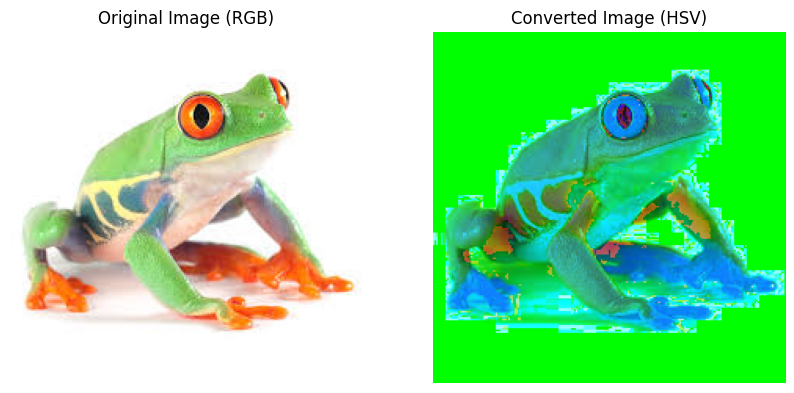

In [ ]:
# ------------------------------------------------------------------------------
# COLOR space convert ----------------------------------------------------------
# ------------------------------------------------------------------------------


import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in RGB format
image = cv2.imread('/content/drive/MyDrive/frogjpg.jpg')  # Replace 'image.jpg' with your image file path
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Convert RGB to HSV
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # COLOR_BGR2Lab    COLOR_BGR2YCrCb   COLOR_BGR2HLS

# Display the images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image (RGB)')
plt.axis('off')

# HSV Image
plt.subplot(1, 2, 2)
plt.imshow(image_hsv)
plt.title('Converted Image (HSV)')
plt.axis('off')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:591: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


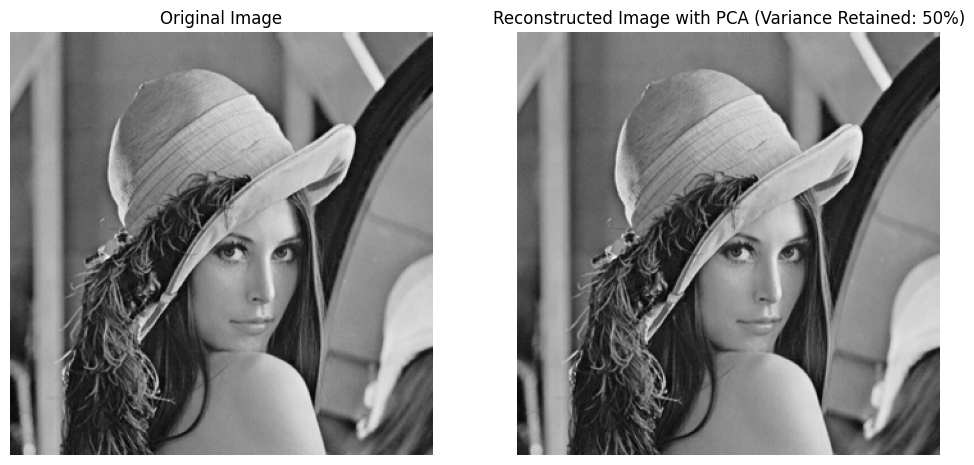

In [ ]:
# ------------------------------------------------------------------------------
# PCA - fail   -----------------------------------------------------------------
# ------------------------------------------------------------------------------


import cv2
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the image and convert to grayscale
image_path = '/content/drive/MyDrive/lana.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Flatten the image
h, w = image.shape
image_flat = image.flatten().reshape(1, -1)

# Set the proportion of variance to retain (e.g., 0.95 for 95%)
variance_retained = 0.5

# Perform PCA
pca = PCA(variance_retained)
image_pca = pca.fit_transform(image_flat)

# Inverse transform to reconstruct the image
image_reconstructed = pca.inverse_transform(image_pca)
image_reconstructed = image_reconstructed.reshape(h, w)

# Display the original and reconstructed images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Reconstructed Image with PCA (Variance Retained: {:.0f}%)'.format(variance_retained * 100))
plt.imshow(image_reconstructed, cmap='gray')
plt.axis('off')

plt.show()


Number of faces detected: 1


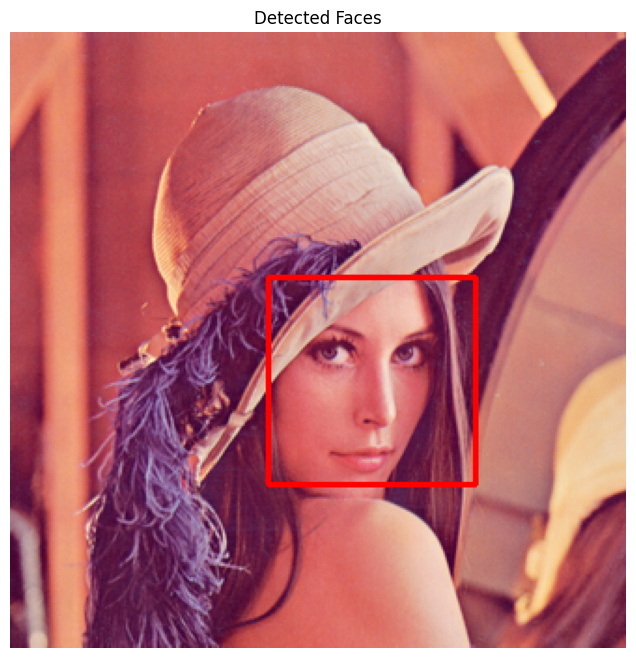

0.6462316513061523


In [ ]:
# ------------------------------------------------------------------------------
# face detection - haar cascade - cv2   ----------------------------------------
# ------------------------------------------------------------------------------

import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

start = time.time()

def detect_faces(image_path):
    # Load the pre-trained face detection classifier
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Read the image
    img = cv2.imread(image_path)

    # Convert to grayscale (required for Haar Cascade)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30)
    )

    # Convert BGR to RGB for correct color display in pyplot
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Print number of faces detected
    print(f"Number of faces detected: {len(faces)}")

    # Display image using pyplot
    plt.figure(figsize=(10, 8))
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axis
    plt.title('Detected Faces')
    plt.show()

def main():
    # Detect faces in a single image
    detect_faces(image_path)

if __name__ == '__main__':
    main()

end = time.time()
el = end - start
print(el)

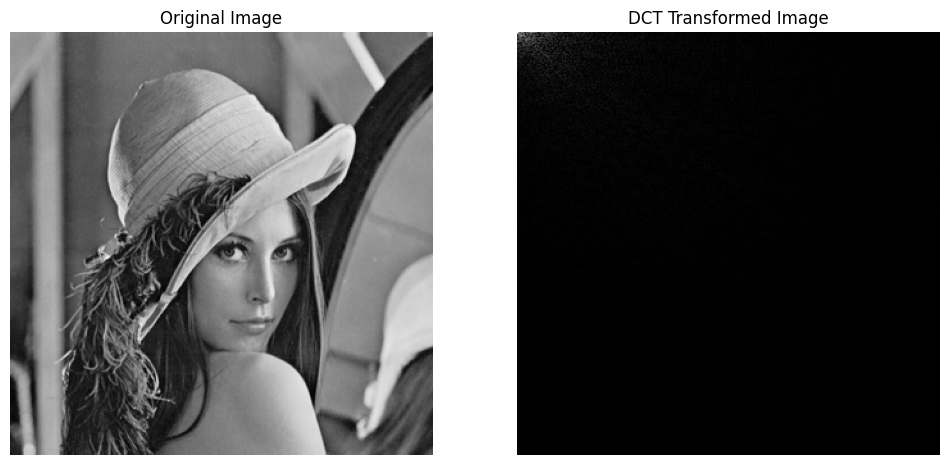

In [ ]:
# ------------------------------------------------------------------------------
# DCT transform of an image  ---------------------------------------------------
# ------------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct
from skimage import io, color

# Load the image

image_path = '/content/drive/MyDrive/lana.png'

image = io.imread(image_path)  # Replace with your image path
gray_image = color.rgb2gray(image)    # Convert to grayscale

# Function to perform DCT
def dct_2d(image):
    return dct(dct(image.T, norm='ortho').T, norm='ortho')

# Function to perform inverse DCT
def idct_2d(dct_image):
    return idct(idct(dct_image.T, norm='ortho').T, norm='ortho')

# Perform DCT
dct_image = dct_2d(gray_image)

# Display the original and DCT transformed image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('DCT Transformed Image')
plt.imshow(np.log(np.abs(dct_image) + 1), cmap='gray')  # Log scale for better visualization
plt.axis('off')

plt.show()

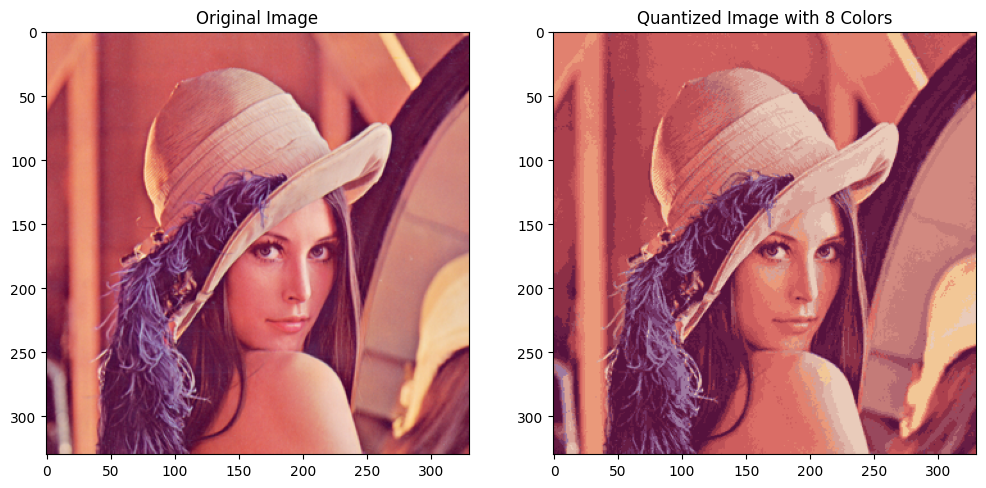

In [ ]:
# ------------------------------------------------------------------------------
# Color Quantization   ---------------------------------------------------------
# ------------------------------------------------------------------------------

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the image
image_path = '/content/drive/MyDrive/lana.png'

image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels
pixels = image_rgb.reshape(-1, 3)

# Define the number of colors (clusters) for quantization
num_colors = 20

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_colors)
kmeans.fit(pixels)

# Replace each pixel with its nearest cluster center
quantized_pixels = kmeans.cluster_centers_[kmeans.labels_]
quantized_image = quantized_pixels.reshape(image_rgb.shape).astype(np.uint8)

# Display the original and quantized images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_rgb)

plt.subplot(1, 2, 2)
plt.title('Quantized Image with 8 Colors')
plt.imshow(quantized_image)

plt.show()


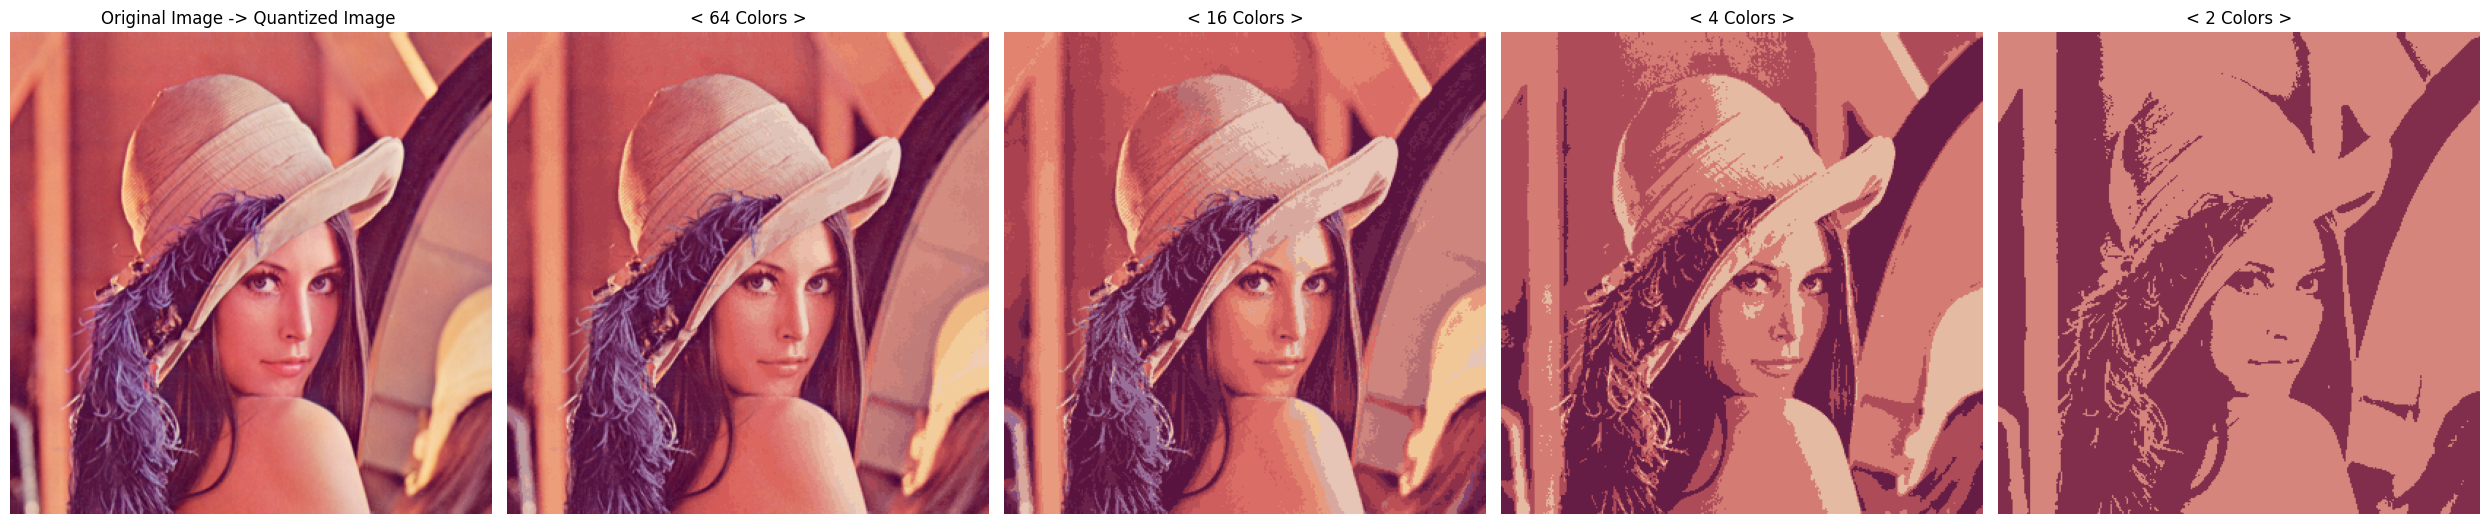

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the image
image_path = '/content/drive/MyDrive/lana.png'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels
pixels = image_rgb.reshape(-1, 3)

# Define the number of colors (clusters) for quantization
color_counts = [128, 16, 4, 2]

# Create a plot to display the original and quantized images
plt.figure(figsize=(25, 25))

# Display the original image
plt.subplot(1, 5, 1)
plt.title('Original Image -> Quantized Image ')
plt.imshow(image_rgb)
plt.axis('off')

# Apply KMeans clustering for each color count and display the results
for i, num_colors in enumerate(color_counts):
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=num_colors)
    kmeans.fit(pixels)

    # Replace each pixel with its nearest cluster center
    quantized_pixels = kmeans.cluster_centers_[kmeans.labels_]
    quantized_image = quantized_pixels.reshape(image_rgb.shape).astype(np.uint8)

    # Display the quantized image
    plt.subplot(1, 5, i + 2)
    plt.title(f'< {num_colors} Colors >')
    plt.imshow(quantized_image)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import heapq

class Node:
    def __init__(self, char, freq):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):  # For heapq comparison
        return self.freq < other.freq


def build_huffman_tree(freq_dict):
    """Builds the Huffman tree from symbol frequencies."""
    heap = [Node(char, freq) for char, freq in freq_dict.items()]
    heapq.heapify(heap)  # Create a min-heap

    while len(heap) > 1:
        node1 = heapq.heappop(heap)
        node2 = heapq.heappop(heap)
        merged_node = Node(None, node1.freq + node2.freq)
        merged_node.left = node1
        merged_node.right = node2
        heapq.heappush(heap, merged_node)

    return heap[0]  # Root of the Huffman tree


def generate_codes(node, code="", codes={}):
    """Recursively generates Huffman codes."""
    if node is None:
        return

    if node.char is not None:
        codes[node.char] = code
    generate_codes(node.left, code + "0", codes)
    generate_codes(node.right, code + "1", codes)
    return codes


def huffman_encode(text):
    """Encodes text using Huffman coding."""
    freq_dict = {}
    for char in text:
        freq_dict[char] = freq_dict.get(char, 0) + 1

    root = build_huffman_tree(freq_dict)
    codes = generate_codes(root)
    encoded_text = "".join(codes[char] for char in text)
    return encoded_text, codes


def huffman_decode(encoded_text, codes):
    """Decodes Huffman-encoded text."""
    decoded_text = ""
    current_code = ""
    reverse_codes = {code: char for char, code in codes.items()}

    for bit in encoded_text:
        current_code += bit
        if current_code in reverse_codes:
            decoded_text += reverse_codes[current_code]
            current_code = ""

    return decoded_text


# Example usage:
text = "this is an example string"
encoded_text, codes = huffman_encode(text)
decoded_text = huffman_decode(encoded_text, codes)

print("Original text:", text)
print("Encoded text:", encoded_text)
print("Decoded text:", decoded_text)

Original text: this is an example string
Encoded text: 11011111101010010101010010111100111101000011011101111000110010000101100110111001010011111000
Decoded text: this is an example string
